In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from vae.arch import VAE

In [11]:
new_data = np.load('./data/obs_data_car_racing_22.npz')["arr_0"]
data = np.array([item for obs in new_data for item in obs])

In [12]:
print(data.dtype)
print(data.shape)
print(9888*64*64*3*4/1024/1024)

float32
(9888, 64, 64, 3)
463.5


In [13]:
vae = VAE()

In [14]:
vae.set_weights('./vae/weights.h5')

In [15]:
vae.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 31, 31, 32)   1568        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 14, 14, 64)   32832       conv2d_5[0][0]                   
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 6, 6, 64)     65600       conv2d_6[0][0]                   
__________________________________________________________________________________________________
conv2d_8 (

In [26]:
img = data[0]

In [27]:
dream_img = vae.model.predict(x = np.expand_dims(img, axis=0))

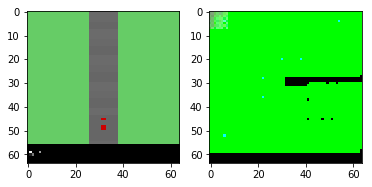

In [28]:
f, axarr = plt.subplots(1, 2)
axarr[0].imshow(img)
axarr[1].imshow(dream_img[0])